# Gravitational Chirp Signal Wavelet Transform
We wish to analysis the signal from the merging of 2 blackholes. 
Merging compact objects produces a chirp signal in the gravitational wave detector.
Assuming the chirp signal can be obtained by:

\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

First we define the function:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def Gravitational_Chirp(t):
    if(0<=t and t<=15): 
        y=np.sin(((t)*(t)))
    else:
        y=0 
    return y


We graph the chirp signal 

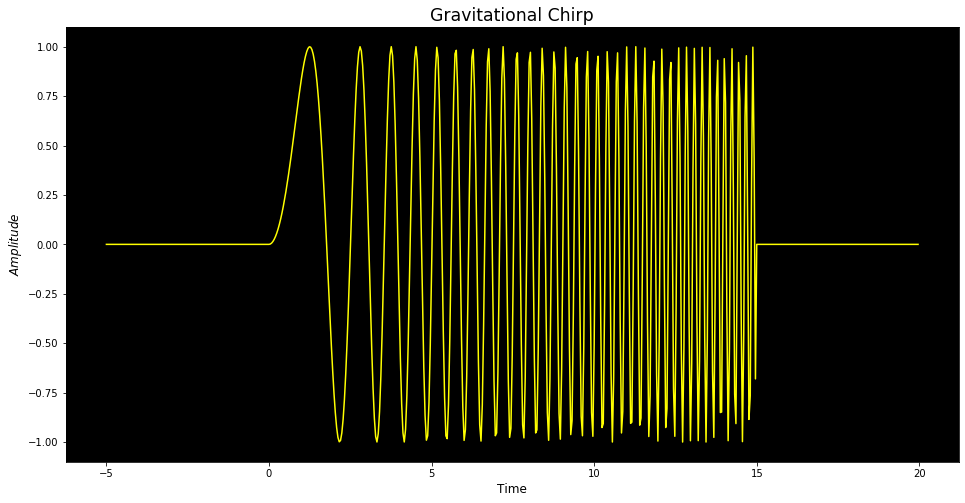

In [2]:
t=np.arange(-5,20,20/500)
y=np.zeros(len(t))
for idx in range(len(t)):
    y[idx]=Gravitational_Chirp(t[idx])
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=[16, 8])
plt.title('Gravitational Chirp', fontsize='xx-large')
plt.xlabel("Time", fontsize='large')
plt.ylabel('$Amplitude$', fontsize='large')
plt.plot(t,y,c="yellow")

plt.show()

## Wavelet Analysis
We aim to analyze this signal in order to achieve information about the frequency of the wave and when it happens. We analyze it utilizing the Morlet wavelet with $\sigma=1$

In [3]:
ns=100
ntau=500
dstep=4./ns
sar=np.arange(0.001,4.001,dstep)

dtaustep=25./ntau
tauar=np.arange(-5.,20.,dtaustep)
ystau=np.zeros((ns, ntau),complex)

nt=5000
dtstep=25./nt
tar=np.arange(-5.,20.,dtstep)

def func(t):
    return Gravitational_Chirp(t)


def Gravitational_Chirp(t):
    if(0<t and t<15): 
        y=np.sin(t**2)
    else:
        y=0 
    return y


def morlet(t,sigma):
    psi=np.exp(2.*np.pi*t*1j)*np.exp(-t*t/2./sigma/sigma)
    return psi


yarr=np.zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau] = 1/np.sqrt(sar[idexs])*dtstep* sum(np.conjugate(morlet(((tar-tauar[idextau])/sar[idexs]),1.275))*yarr)                                           
    
wavelet()

<Figure size 432x288 with 0 Axes>

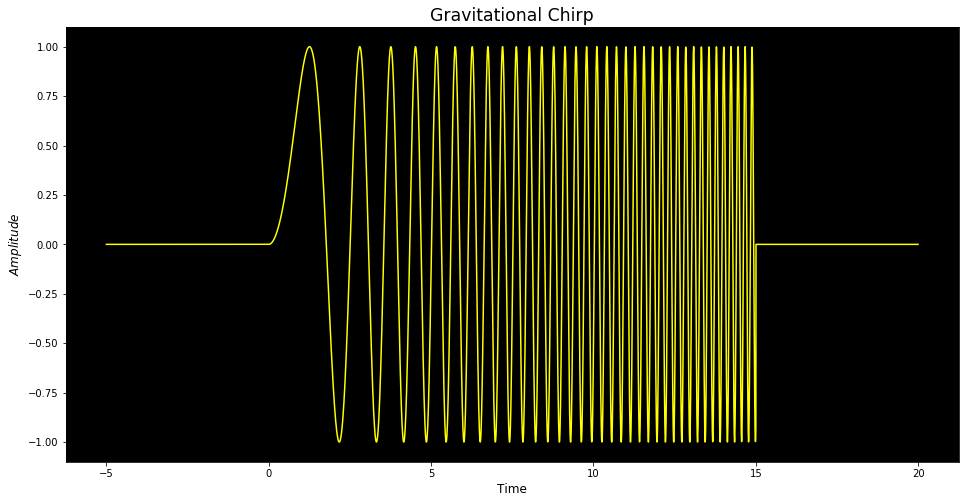

In [4]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   

fig = p.figure()                            
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=[16, 8])
plt.title('Gravitational Chirp', fontsize='xx-large')
plt.xlabel("Time", fontsize='large')
plt.ylabel('$Amplitude$', fontsize='large')
p.plot(tar,yarr,c="yellow")




### Contour Plots (Time vs Frequency)  &  (Frequency vs Time)
#### $Intensity \sim (Time, Frequency) $  

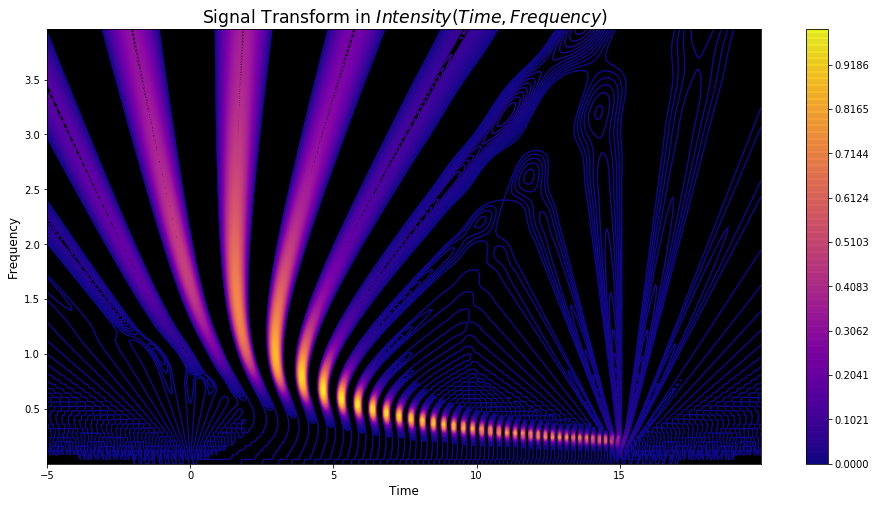

In [5]:
fig = p.figure(figsize=[16,8]) 
plt.rcParams['axes.facecolor'] = 'black'
levels=p.arange(abs(np.transpose(ystau)).min(),abs(np.transpose(ystau)).max(),(abs(np.transpose(ystau)).max() - abs(np.transpose(ystau)).min())/500.)
#CS=p.contour(sar,tauar,np.transpose(ystau).imag, levels=levels)
CS=p.contour(tauar,sar,ystau.imag,cmap="plasma", levels=levels)
plt.title('Signal Transform in $ Intensity(Time,Frequency) $', fontsize='xx-large')
p.xlabel('Time',fontsize='large')
p.ylabel('Frequency',fontsize='large')
p.colorbar()
p.show()



#### $Intensity \sim ( Frequency,Time) $  

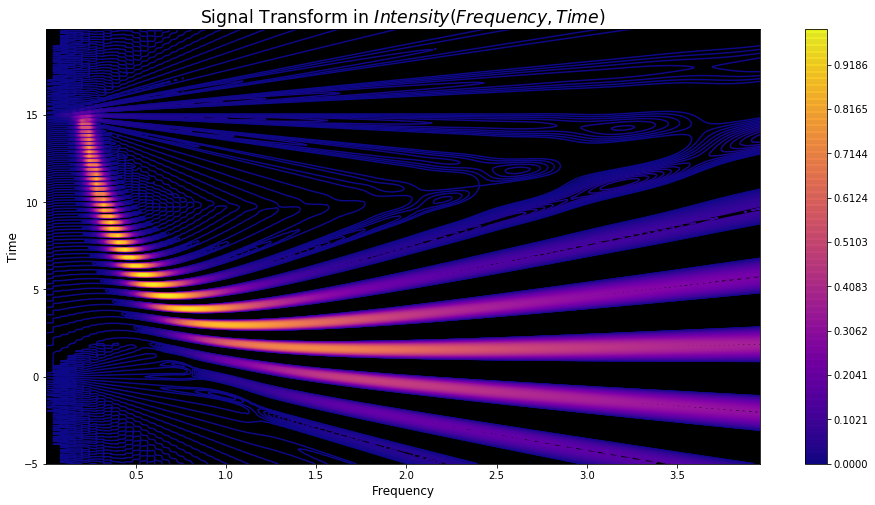

In [6]:
fig = p.figure(figsize=[16,8]) 
plt.rcParams['axes.facecolor'] = 'black'
levels=p.arange(abs(np.transpose(ystau)).min(),abs(np.transpose(ystau)).max(),(abs(np.transpose(ystau)).max() - abs(np.transpose(ystau)).min())/500.)
CS=p.contour(sar,tauar,np.transpose(ystau).imag, cmap="plasma",levels=levels)
#CS=p.contour(tauar,sar,ystau.imag,cmap="plasma", levels=levels)
plt.title('Signal Transform in $ Intensity(Frequency, Time) $', fontsize='xx-large')
p.xlabel('Frequency',fontsize='large')
p.ylabel('Time',fontsize='large')
p.colorbar()
p.show()




### Reconstruction of original wave

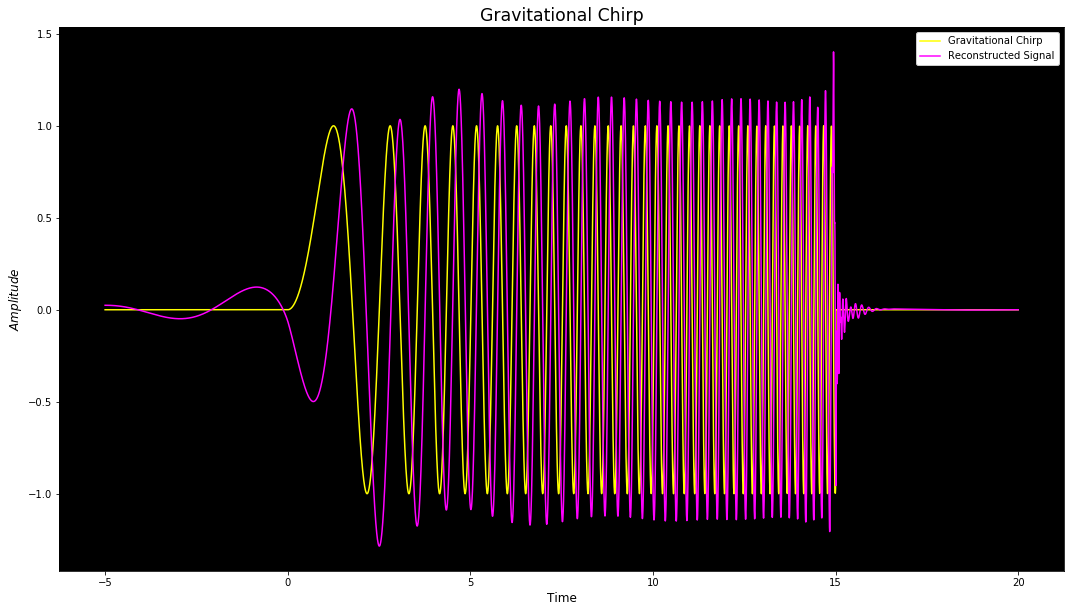

In [7]:
yarr2=np.zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./np.sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.275)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
fig= p.figure(figsize=[18, 10])
p.plot(tar,yarr,label= 'Gravitational Chirp' ,c="yellow")
p.plot(tar,yarr2.imag,label="Reconstructed Signal",c="fuchsia")

plt.title('Gravitational Chirp', fontsize='xx-large')
plt.xlabel("Time", fontsize='large')
plt.ylabel('$Amplitude$', fontsize='large')
p.legend(facecolor='white', framealpha=1)
p.show()

### Analysis:
It seems as if our representation of the chirp using the contour map of Intesity (Time, Frequency) is a mirrored image of those published online from ligo s.t:
<img src="Screen Shot.png">



So there seems to be a negative time aspect to the event where the two massive bodies collide. This makes sense since the frequency peaks as the bodies get closer and closer so we try to define a negative chirp with the same shape:


In [8]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p  
ns=100
ntau=500
dstep=4./ns
sar=np.arange(0.001,4.001,dstep)

dtaustep=25./ntau
tauar=np.arange(-20.,5.,dtaustep)
ystau=np.zeros((ns, ntau),complex)

nt=5000
dtstep=25./nt
tar=np.arange(-20.,5.,dtstep)

def func(t):
    return negGravitational_Chirp(t)


def negGravitational_Chirp(t):
    if(-15<=t and t<=0): 
        y=np.sin(t**2)
    else:
        y=0 
    return y


def morlet(t,sigma):
    psi=np.exp(2.*np.pi*t*1j)*np.exp(-t*t/2./sigma/sigma)
    return psi


yarr=np.zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau] = 1/np.sqrt(sar[idexs])*dtstep* sum(np.conjugate(morlet(((tar-tauar[idextau])/sar[idexs]),1.275))*yarr)                                           
    
wavelet()
 


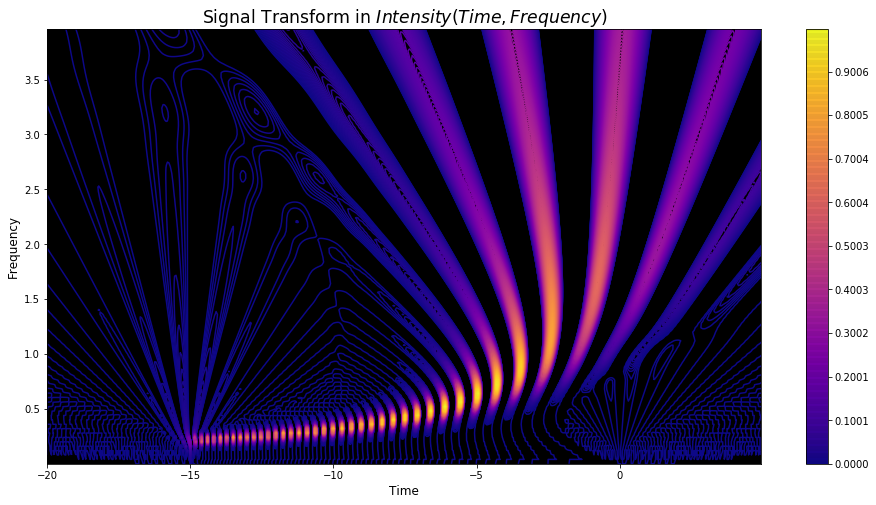

In [9]:
fig = p.figure(figsize=[16,8]) 
plt.rcParams['axes.facecolor'] = 'black'
levels=p.arange(abs(np.transpose(ystau)).min(),abs(np.transpose(ystau)).max(),(abs(np.transpose(ystau)).max() - abs(np.transpose(ystau)).min())/500.)
#CS=p.contour(sar,tauar,np.transpose(ystau).imag, levels=levels)
CS=p.contour(tauar,sar,ystau.imag,cmap="plasma", levels=levels)
plt.title('Signal Transform in $ Intensity(Time,Frequency) $', fontsize='xx-large')
p.xlabel('Time',fontsize='large')
p.ylabel('Frequency',fontsize='large')
p.colorbar()
p.show()




